# STEP 1: Set up your reproducible workflow

### Import Python libraries

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Import packages</div></div><div class="callout-body-container callout-body"><p>In the imports cell, we’ve included a number of packages that you
will need. Add imports for packages that will help you:</p>
<ol type="1">
<li>Work with tabular data</li>
<li>Work with geospatial vector data</li>
</ol></div></div>

In [35]:
import os
import pathlib

### Create a folder for your data

For this challenge, you will need to save some data to the computer
you’re working on. We suggest saving to somewhere in your *home* folder
(e.g. `/home/username`), rather than to your GitHub repository, since
data files can easily become too large for GitHub.

> **Warning**
>
> The **home** directory is different for every user! Your home
> directory probably won’t exist on someone else’s computer. Make sure
> to use code like `pathlib.Path.home()` to compute the home directory
> on the computer the code is running on. This is key to writing
> reproducible and interoperable code.

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Create a project folder</div></div><div class="callout-body-container callout-body"><p>The code below will help you get started with making a project
directory</p>
<ol type="1">
<li>Replace <code>'your-project-directory-name-here'</code> and
<code>'your-gbif-data-directory-name-here'</code> with
<strong>descriptive</strong> names</li>
<li>Run the cell</li>
<li>(OPTIONAL) Check in the terminal that you created the directory
using the command <code>ls ~/earth-analytics/data</code></li>
</ol></div></div>

In [36]:
import os
import pathlib
# Create data directory in the home folder
data_dir = os.path.join(
    # Home directory
    pathlib.Path.home(),
    # Earth analytics data directory
    'earth-analytics',
    'data',
    # Project directory
    'migrationstudy',
)
os.makedirs(data_dir, exist_ok=True)

## STEP 2: Define your study area – the ecoregions of North America

Track observations of Taciyagnunpa across different **ecoregions**! You
should be able to see changes in the number of observations in each
ecoregion throughout the year.

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-read"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Read More</div></div><div class="callout-body-container callout-body"><p>The ecoregion data will be available as a <strong>shapefile</strong>.
Learn more about shapefiles and vector data in this <a
href="https://www.earthdatascience.org/courses/intro-to-earth-data-science/file-formats/use-spatial-data/use-vector-data/">Introduction
to Spatial Vector Data File Formats in Open Source Python</a></p></div></div>

### Download and save ecoregion boundaries

The ecoregion boundaries take some time to download – they come in at
about 150MB. To use your time most efficiently, we recommend **caching**
the ecoregions data on the machine you’re working on so that you only
have to download once. To do that, we’ll also introduce the concept of
**conditionals**, or code that adjusts what it does based on the
situation.

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-read"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Read More</div></div><div class="callout-body-container callout-body"><p>Read more about conditionals in this <a
href="https://www.earthdatascience.org/courses/intro-to-earth-data-science/write-efficient-python-code/conditional-statements/">Intro
Conditional Statements in Python</a></p></div></div>

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Get ecoregions boundaries</div></div><div class="callout-body-container callout-body"><ol type="1">
<li>Find the URL for for the ecoregion boundary
<strong>Shapefile</strong>. You can <a
href="https://www.geographyrealm.com/terrestrial-ecoregions-gis-data/">get
ecoregion boundaries from Google.</a>.</li>
<li>Replace <code>your/url/here</code> with the URL you found, making
sure to format it so it is easily readable. Also, replace
<code>ecoregions_dirname</code> and <code>ecoregions_filename</code>
with descriptive and machine-readable names for your project’s file
structure.</li>
<li>Change all the variable names to <strong>descriptive</strong>
variable names, making sure to correctly reference variables you created
before.</li>
<li>Run the cell to download and save the data.</li>
</ol></div></div>

In [ ]:
import os
import pathlib
# Create data directory in the home folder
data_dir = os.path.join(
    # Home directory
    pathlib.Path.home(),
    # Earth analytics data directory
    'earth-analytics',
    'data',
    # Project directory
    'migrationstudy',
)
os.makedirs(data_dir, exist_ok=True)
# Set up the ecoregion boundary URL
# as per https://www.allaboutbirds.org/guide/assets/photo/39405601-720px.jpg will need North, Central, and South America plus Carribean Islands
# as per https://www.geographyrealm.com/wp-content/uploads/2021/05/biomes-ecoregion.png this would mean all of NEARCTIC and NEOTROPIC
#Catharus fuscescens
#Veery Thrush
#Taciyagnunpa
url = "https://storage.googleapis.com/teow2016/Ecoregions2017.zip"

# Set up a path to save the data on your machine
ecoregiondata = os.path.join(project_data_dir, 'ecoregions')
# Make the ecoregions directory

# Join ecoregions shapefile path
a_path = os.path.join(ecoregiondata, 'ecoregions_shape.shp')

# Only download once
if not os.path.exists(a_path):
    my_gdf = gpd.read_file(url)
    my_gdf.to_file(a_path)

Let’s check that that worked! To do so we’ll use a **bash** command
called `find` to look for all the files in your project directory with
the `.shp` extension:

In [ ]:
import os
import pathlib
import requests
import zipfile
import geopandas as gpd

# Set up the ecoregion boundary URL
# as per https://www.allaboutbirds.org/guide/assets/photo/39405601-720px.jpg will need North, Central, and South America plus Carribean Islands
# as per https://www.geographyrealm.com/wp-content/uploads/2021/05/biomes-ecoregion.png this would mean all of NEARCTIC and NEOTROPIC
#Catharus fuscescens
#Veery Thrush
#Taciyagnunpa
#Get some help from ChatGPT

# Create data directory in the home folder
data_dir = os.path.join(
    # Home directory
    pathlib.Path.home(),
    # Earth analytics data directory
    'earth-analytics',
    'data',
    # Project directory
    'migrationstudy',
)
os.makedirs(data_dir, exist_ok=True)

# Set up the ecoregion boundary URL
url = "https://storage.googleapis.com/teow2016/Ecoregions2017.zip"

# Set up a path to save the zip file and extracted data
ecoregion_zip_path = os.path.join(data_dir, 'Ecoregions2017.zip')
ecoregion_extract_path = os.path.join(data_dir, 'ecoregions')

# Download the ZIP file if it doesn't exist
if not os.path.exists(ecoregion_zip_path):
    response = requests.get(url)
    with open(ecoregion_zip_path, 'wb') as file:
        file.write(response.content)

# Extract the zip file if the directory doesn't exist
if not os.path.exists(ecoregion_extract_path):
    with zipfile.ZipFile(ecoregion_zip_path, 'r') as zip_ref:
        zip_ref.extractall(ecoregion_extract_path)

# Path to the shapefile
shapefile_path = os.path.join(ecoregion_extract_path, 'Ecoregions2017.shp')

# Only read the shapefile once it is extracted
if not os.path.exists(shapefile_path):
    print("Shapefile not found after extraction!")
else:
    # Read the shapefile with geopandas
    my_gdf = gpd.read_file(shapefile_path)
    # Optionally save the shapefile to a new location if needed
    my_gdf.to_file(os.path.join(data_dir, 'ecoregions_shape.shp'))
    print("Ecoregions shapefile saved successfully!")

In [ ]:
%%bash
find ~/earth-analytics/data/species-distribution -name '*.shp' 

In [ ]:
#trying again with CGPT
#zipfile is downloads on windows  
import os
import pathlib
import requests
import zipfile
import geopandas as gpd
import glob
import matplotlib.pyplot as plt

# Create data directory in the home folder
data_dir = os.path.join(
    # Home directory
    pathlib.Path.home(),
    # Earth analytics data directory
    'earth-analytics',
    'data',
    # Project directory
    'migrationstudy',
)
os.makedirs(data_dir, exist_ok=True)

# Set up the ecoregion boundary URL
url = "https://storage.googleapis.com/teow2016/Ecoregions2017.zip"

# Set up a path to save the zip file and extracted data
ecoregion_zip_path = os.path.join(data_dir, 'Ecoregions2017.zip')
ecoregion_extract_path = os.path.join(data_dir, 'ecoregions')

# Download the ZIP file if it doesn't exist
if not os.path.exists(ecoregion_zip_path):
    response = requests.get(url)
    with open(ecoregion_zip_path, 'wb') as file:
        file.write(response.content)

# Extract the zip file if the directory doesn't exist
if not os.path.exists(ecoregion_extract_path):
    with zipfile.ZipFile(ecoregion_zip_path, 'r') as zip_ref:
        zip_ref.extractall(ecoregion_extract_path)

# Path to the shapefile
shapefile_path = os.path.join(ecoregion_extract_path, 'Ecoregions2017.shp')

# Only read the shapefile once it is extracted
if not os.path.exists(shapefile_path):
    print("Shapefile not found after extraction!")
else:
    # Read the shapefile with geopandas
    my_gdf = gpd.read_file(shapefile_path)
    # Optionally save the shapefile to a new location if needed
    my_gdf.to_file(os.path.join(data_dir, 'ecoregions_shape.shp'))
    print("Ecoregions shapefile saved successfully!")

# Function to find all shapefiles in the species-distribution directory
def find_shapefiles(directory):
    # Use glob to find all .shp files recursively in the specified directory
    shapefiles = glob.glob(os.path.join(directory, '**', '*.shp'), recursive=True)
    return shapefiles

# Define the species distribution directory
species_distribution_dir = os.path.join(
    pathlib.Path.home(),
    'earth-analytics',
    'data',
    'species-distribution'
)

# Find all shapefiles in the species distribution directory
shapefiles = find_shapefiles(species_distribution_dir)

# Print all found shapefiles
print("Found shapefiles:")
for shp in shapefiles:
    print(shp)


> **Tip**
>
> You can also run bash commands in the terminal!

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-read"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Read More</div></div><div class="callout-body-container callout-body"><p>Learn more about bash in this <a
href="https://www.earthdatascience.org/courses/intro-to-earth-data-science/open-reproducible-science/bash/">Introduction
to Bash</a></p></div></div>

### Load the ecoregions into Python

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Load ecoregions into Python</div></div><div class="callout-body-container callout-body"><p>Download and save ecoregion boundaries from the EPA:</p>
<ol type="1">
<li>Replace <code>a_path</code> with the path your created for your
ecoregions file.</li>
<li>(optional) Consider renaming and selecting columns to make your
<code>GeoDataFrame</code> easier to work with. Many of the same methods
you learned for <code>pandas</code> <code>DataFrame</code>s are the same
for <code>GeoDataFrame</code>s!</li>
<li>Make a quick plot with <code>.plot()</code> to make sure the
download worked.</li>
<li>Run the cell to load the data into Python</li>
</ol></div></div>

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import os

# Path to the shapefile - update this with the actual file path
data_dir = os.path.join(
    pathlib.Path.home(),
    'earth-analytics',
    'data',
    'migrationstudy',
    'ecoregions'  # Assuming the shapefile was extracted here
)

shapefile_path = os.path.join(data_dir, 'Ecoregions2017.shp')  # Ensure this path points to the actual shapefile

# Check if the file exists before proceeding
if not os.path.exists(shapefile_path):
    print(f"Shapefile not found at {shapefile_path}")
else:
    # Open up the ecoregions boundaries
    gdf = gpd.read_file(shapefile_path)

    # Name the index so it will match the other data later on
    gdf.index.name = 'ecoregion'

    # Examine the ecoregion GeoDataFrame
    print(gdf.head())

    # Plot the ecoregions to check the download
    # Customize the plot with a title and a color map
    fig, ax = plt.subplots(figsize=(10, 8))  # Adjust the figure size for better visibility
    gdf.plot(ax=ax, column='BIOME_NAME', legend=True, cmap='Set3')  # Assuming 'BIOME_NAME' is a valid column

    # Set a title for the plot
    ax.set_title("Ecoregions of the World", fontsize=16)

    # Show the plot
    plt.show()



Index(['OBJECTID', 'ECO_NAME', 'BIOME_NUM', 'BIOME_NAME', 'REALM',
       'ECO_BIOME_', 'NNH', 'ECO_ID', 'SHAPE_LENG', 'SHAPE_AREA', 'NNH_NAME',
       'COLOR', 'COLOR_BIO', 'COLOR_NNH', 'LICENSE', 'geometry'],
      dtype='object')


/opt/conda/lib/python3.10/site-packages/geopandas/plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):


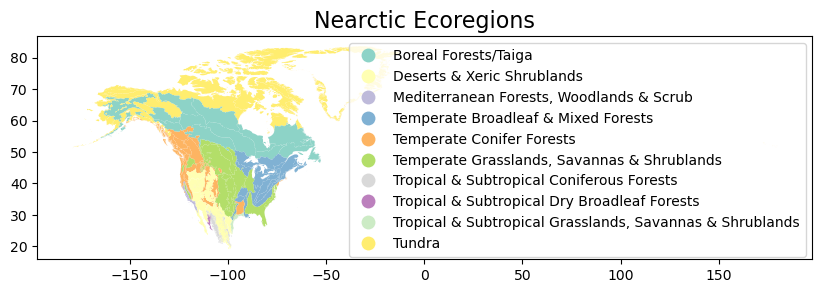

In [40]:
#This code selects north america
import geopandas as gpd
import matplotlib.pyplot as plt
import os

# Path to the shapefile - update this with the actual file path
data_dir = os.path.join(
    pathlib.Path.home(),
    'earth-analytics',
    'data',
    'migrationstudy',
    'ecoregions'  # Assuming the shapefile was extracted here
)

shapefile_path = os.path.join(data_dir, 'Ecoregions2017.shp')  # Ensure this path points to the actual shapefile

# Check if the file exists before proceeding
if not os.path.exists(shapefile_path):
    print(f"Shapefile not found at {shapefile_path}")
else:
    # Open up the ecoregions boundaries
    gdf = gpd.read_file(shapefile_path)

    # Name the index so it will match the other data later on
    gdf.index.name = 'ecoregion'

    # Check column names to find the one that contains biome or realm information
    print(gdf.columns)

    # Filter for only the Nearctic ecoregions
    # Assuming the column for realms is named 'REALM', update if necessary
    nearctic_gdf = gdf[gdf['REALM'] == 'Nearctic']

    # If 'REALM' is not the right column, replace it with the correct one after inspecting gdf.columns

    # Plot the Nearctic ecoregions
    fig, ax = plt.subplots(figsize=(10, 8))  # Adjust the figure size for better visibility
    nearctic_gdf.plot(ax=ax, column='BIOME_NAME', legend=True, cmap='Set3')  # Assuming 'BIOME_NAME' exists

    # Set a title for the plot
    ax.set_title("Nearctic Ecoregions", fontsize=16)

    # Show the plot
    plt.show()


In [41]:
%store



Stored variables and their in-db values:
species_gbif_df                  ->             decimalLatitude  decimalLongitude  mon
species_geo_gbif_gdf             ->             month                    geometry
gbif


## STEP 3: Download species observation data

For this challenge, you will use a database called the [Global
Biodiversity Information Facility (GBIF)](https://www.gbif.org/). GBIF
is compiled from species observation data all over the world, and
includes everything from museum specimens to photos taken by citizen
scientists in their backyards. We’ve compiled some sample data in the
same format that you will get from GBIF.

### Download sample data

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Import GBIF Data</div></div><div class="callout-body-container callout-body"><ol type="1">
<li>Define the <code>gbif_url</code>. You can get sample data from
https://github.com/cu-esiil-edu/esiil-learning-portal/releases/download/data-release/species-distribution-foundations-data.zip</li>
<li>Using the ecoregions code, modify the code cell below so that the
download only runs once, as with the ecoregion data.</li>
<li>Run the cell</li>
</ol></div></div>

In [42]:
import pandas as pd
# Load the GBIF data
gbif_url = (
    'https://github.com/cu-esiil-edu/'
    'esiil-learning-portal/releases/download/'
    'data-release/species-distribution-foundations-data.zip'
)
# Print the URL to check if it works
print(gbif_url)

species_gbif_df = pd.read_csv(
    gbif_url, 
    delimiter='\t',
    index_col='gbifID',
    usecols=['gbifID', 'decimalLatitude', 'decimalLongitude', 'month'])
species_gbif_df.head()

https://github.com/cu-esiil-edu/esiil-learning-portal/releases/download/data-release/species-distribution-foundations-data.zip


,decimalLatitude,decimalLongitude,month
gbifID,,,
4725400674,40.771550,-73.97248,9
4742743075,42.588123,-85.44625,5
4837921585,43.703064,-72.30729,5
4706255418,48.174270,-77.73126,7
4755072666,42.544277,-72.44836,5


### Convert the GBIF data to a GeoDataFrame

To plot the GBIF data, we need to convert it to a `GeoDataFrame` first.
This will make some special geospatial operations from `geopandas`
available, such as spatial joins and plotting.

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Convert `DataFrame` to `GeoDataFrame`</div></div><div class="callout-body-container callout-body"><ol type="1">
<li>Replace <code>your_dataframe</code> with the name of the
<code>DataFrame</code> you just got from GBIF</li>
<li>Replace <code>longitude_column_name</code> and
<code>latitude_column_name</code> with column names from your
`DataFrame</li>
<li>Run the code to get a <code>GeoDataFrame</code> of the GBIF
data.</li>
</ol></div></div>

In [43]:
species_geo_gbif_gdf = (
    gpd.GeoDataFrame(
        species_gbif_df, 
        geometry=gpd.points_from_xy(
            species_gbif_df.decimalLongitude, 
            species_gbif_df.decimalLatitude), 
        crs="EPSG:4326")
    # Select the desired columns
    [['month','geometry']]
)
species_geo_gbif_gdf

,month,geometry
gbifID,,
4725400674,9,POINT (-73.97248 40.77155)
4742743075,5,POINT (-85.44625 42.58812)
4837921585,5,POINT (-72.30729 43.70306)
4706255418,7,POINT (-77.73126 48.17427)
4755072666,5,POINT (-72.44836 42.54428)
...,...,...
4841667942,5,POINT (-78.75946 45.09540)
4768698387,7,POINT (-88.02331 48.99255)
4414313551,5,POINT (-72.79677 43.46352)


<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It</div></div><div class="callout-body-container callout-body"><p>Make sure to store the new version of your <code>DataFrame</code> for
other notebooks!</p>
<div id="70111aa5" class="cell" data-execution_count="15">
<div class="sourceCode" id="cb1"><pre
class="sourceCode python cell-code"><code class="sourceCode python"><span id="cb1-1"><a href="#cb1-1" aria-hidden="true" tabindex="-1"></a><span class="op">%</span>store ecoregions_gdf gbif_gdf</span></code></pre></div>
</div></div></div>

In [44]:
%store species_geo_gbif_gdf species_gbif_df

Stored 'species_geo_gbif_gdf' (GeoDataFrame)
Stored 'species_gbif_df' (DataFrame)
